# Statistics and Econometrics
# Assignment 1: Descriptive statistics

### Importing libs

In [467]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams
%matplotlib inline
sb.set_style('darkgrid')
rcParams['figure.figsize'] = 20, 10

from scipy.stats import trim_mean
from scipy.stats import chi2_contingency

### Data loading

In [468]:
data = pd.ExcelFile('ceo.xls')
data = data.parse(usecols=6)
salary = data.salary

### Glance on the data

In [469]:
data.head(10)

,salary,totcomp,tenure,age,sales,profits,assets
0,3030,8138,7,61,161315.0,2956.0,257389.0
1,6050,14530,0,51,144416.0,22071.0,237545.0
2,3571,7433,11,63,139208.0,4430.0,49271.0
3,3300,13464,6,60,100697.0,6370.0,92630.0
4,10000,68285,18,63,100469.0,9296.0,355935.0
5,9375,42381,6,57,81667.0,6328.0,86100.0
6,9525,12165,15,60,76431.0,5807.0,668641.0
7,5000,24424,5,61,57813.0,5372.0,59920.0
8,999,2916,3,57,56154.0,1120.0,36672.0
9,3300,7467,2,60,53588.0,6398.0,59550.0


### Task 1
### Common location measures

> <font size=3>Computing basic descriptive stats.  
Mean shows us average salary of a CEO.  
Trimmed mean shows us average salary too, but without outliers (lowest and highest 10%), so it more robust.  
p-quantile means that this salary value is bigger than p% of all salary values in our sample. </font> 

In [484]:
print('Mean:\t\t\t {:.4f}'.format(salary.mean()))
print('10%-trimmed mean:\t {:.4f}'.format(trim_mean(salary, 0.1)))
print('Median:\t\t\t {:.4f}'.format(salary.median()))
print('Lower quantile:\t\t {:.4f}'.format(salary.quantile(0.25, interpolation='midpoint')))
print('Upper quantile:\t\t {:.4f}'.format(salary.quantile(0.75, interpolation='midpoint')))
print('Lower 10% quantile:\t {:.4f}'.format(salary.quantile(0.1, interpolation='midpoint')))
print('Upper 10% quantile:\t {:.4f}'.format(salary.quantile(0.9, interpolation='midpoint')))

Mean:			 2027.5168
10%-trimmed mean:	 1710.0919
Median:			 1600.0000
Lower quantile:		 1084.0000
Upper quantile:		 2347.5000
Lower 10% quantile:	 750.0000
Upper 10% quantile:	 3387.0000


### ECDF

> <font size=3>ECDF shows us 'probability' that value of some element from the data will be smaller than given value (argument of ECDF). It's empirical approximation of the distribution function.   
Quantiles are in some sense inverse to ECDF and give us more insights about the data than ECDF, because we can find value, which is higher than given (by quatile value) percent of other values in the dataset. It helps us create more meaningful interpretations.</font>

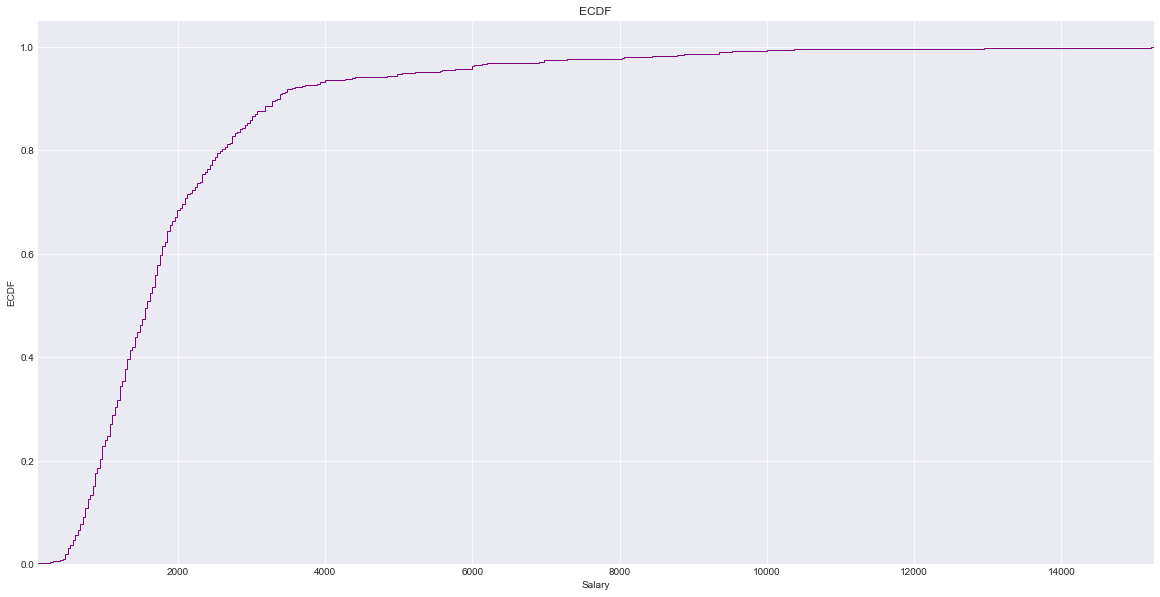

In [485]:
fig, ax = plt.subplots()
ax.set_title('ECDF')
ax.set_xlim(left=salary.min(), right=salary.max())
ax.set_xlabel('Salary')
ax.set_ylabel('ECDF')
ecdfs, salaries, patches = plt.hist(salary, bins=salary.shape[0], cumulative=True, 
                                    density=True, histtype='step', color='purple')

In [472]:
def ecdf(x, data):
    return data[data <= x].shape[0]/data.shape[0]

In [473]:
print('Inverse to ECDF at 0.2: {:.4f}'.format(salary.quantile(0.2, interpolation='higher')))
print('Inverse to ECDF at 0.8: {:.4f}'.format(salary.quantile(0.8, interpolation='higher')))
print('ECDF value at 1000: {:.4f}'.format(ecdf(1000, salary)))
print('1 - ECDF value at 5000: {:.4f}'.format(1 - ecdf(5000, salary)))

Inverse to ECDF at 0.2: 981.0000
Inverse to ECDF at 0.8: 2615.0000
ECDF value at 1000: 0.2237
1 - ECDF value at 5000: 0.0537


### Histogram and boxplot

> <font size=3>Histogram is approximation of a density function. Alongside dimension x we have our variable values and alongside dimension y - relative frequencies (or absolute). Histogram is usefull for visual observation of peaks (modes), skewness and tails.</font>

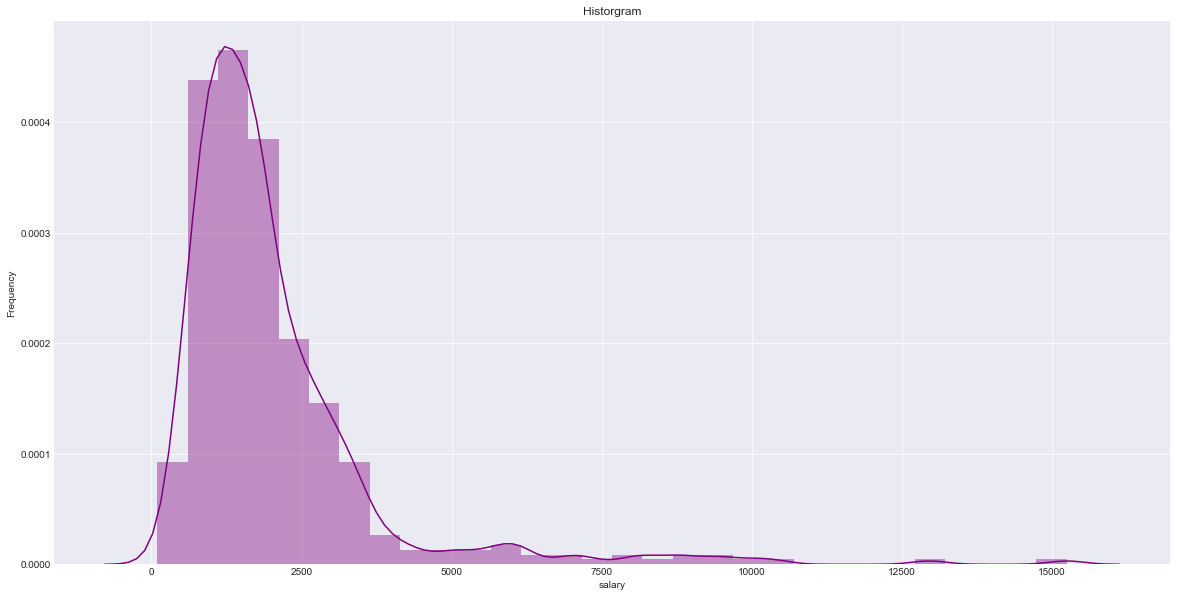

In [474]:
fig, ax = plt.subplots()
ax.set_title('Historgram')
ax.set_xlabel('Salary')
ax.set_ylabel('Frequency')
_ = sb.distplot(salary, bins=30, color='purple')

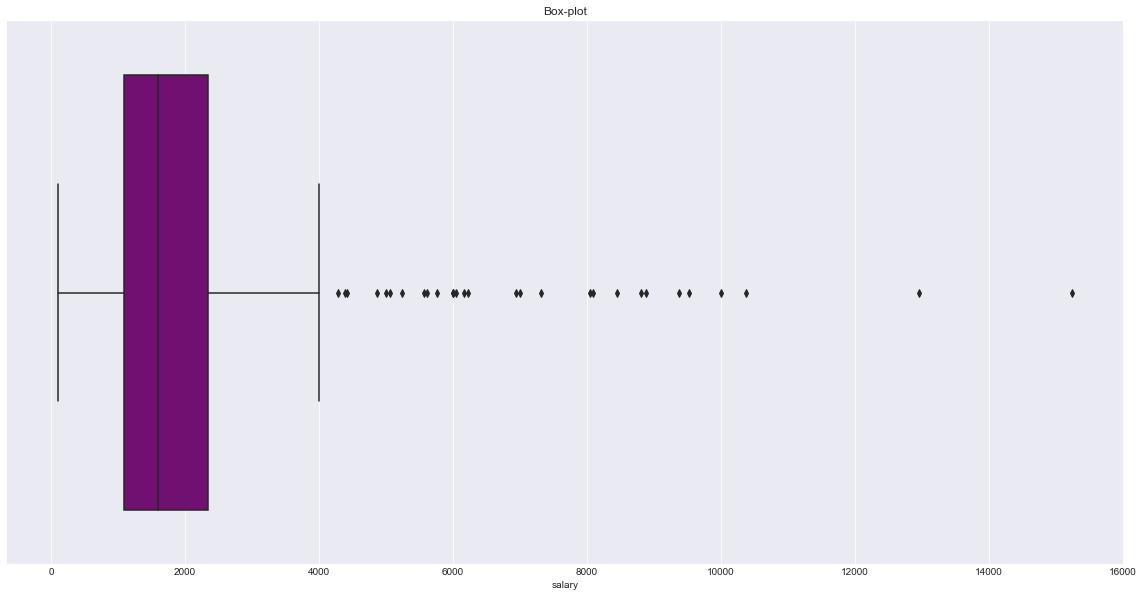

In [475]:
fig, ax = plt.subplots()
ax.set_title('Box-plot')
_ = sb.boxplot(salary, color='purple')

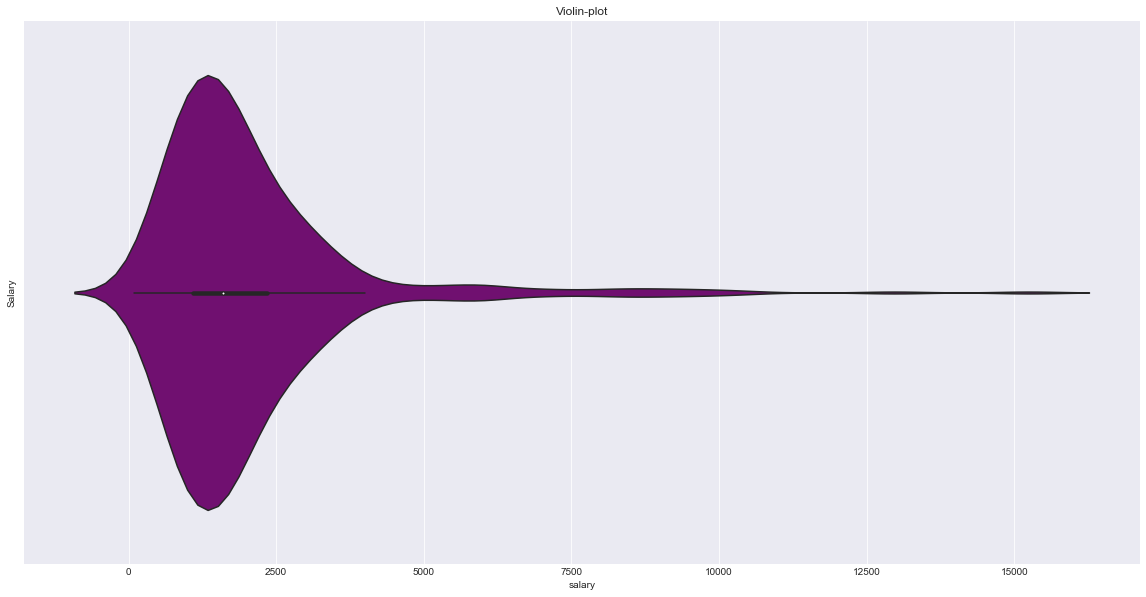

In [476]:
fig, ax = plt.subplots()
ax.set_title('Violin-plot')
ax.set_ylabel('Salary')
_ = sb.violinplot(salary, color='purple')

### Looking for optimal bandwindth

> <font size=3>When you work with histogram it's important to find optimal value for the amount of bins. This parameter controls 'resolution' of a histogram. If it's small, histogram will be too smooth and we can lose information about the data. On the other hand, high value will make histogram too detailed and we won't have abbility to draw conclusions as it lacks generalization.  
In pandas there are several methods to find optimal amount of bins. I used Freedman-Diaconis method. </font>

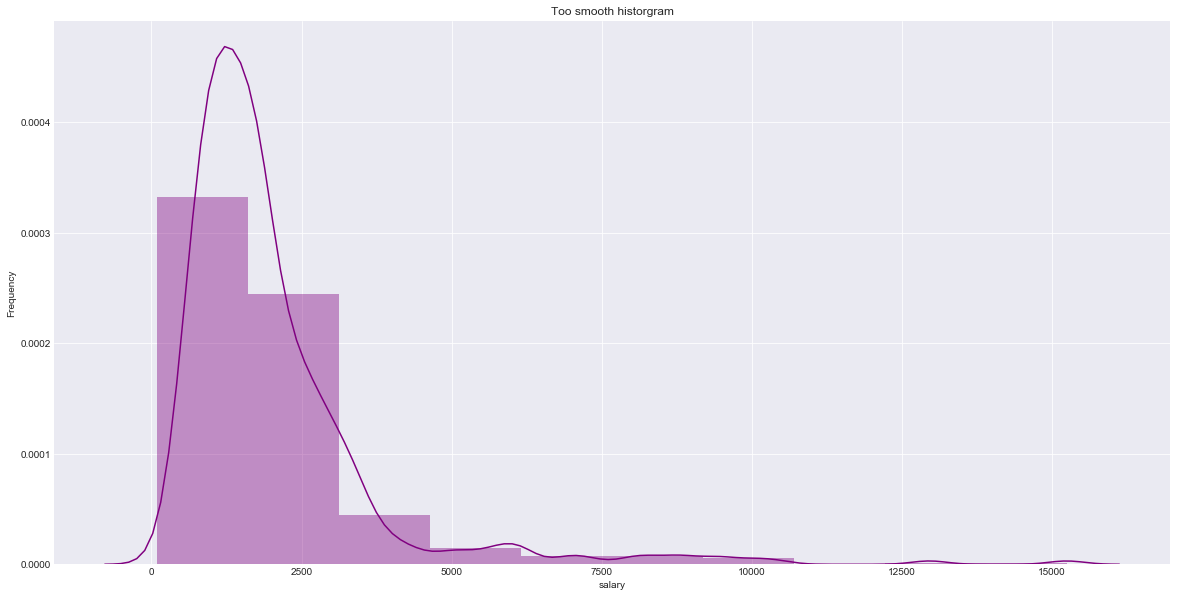

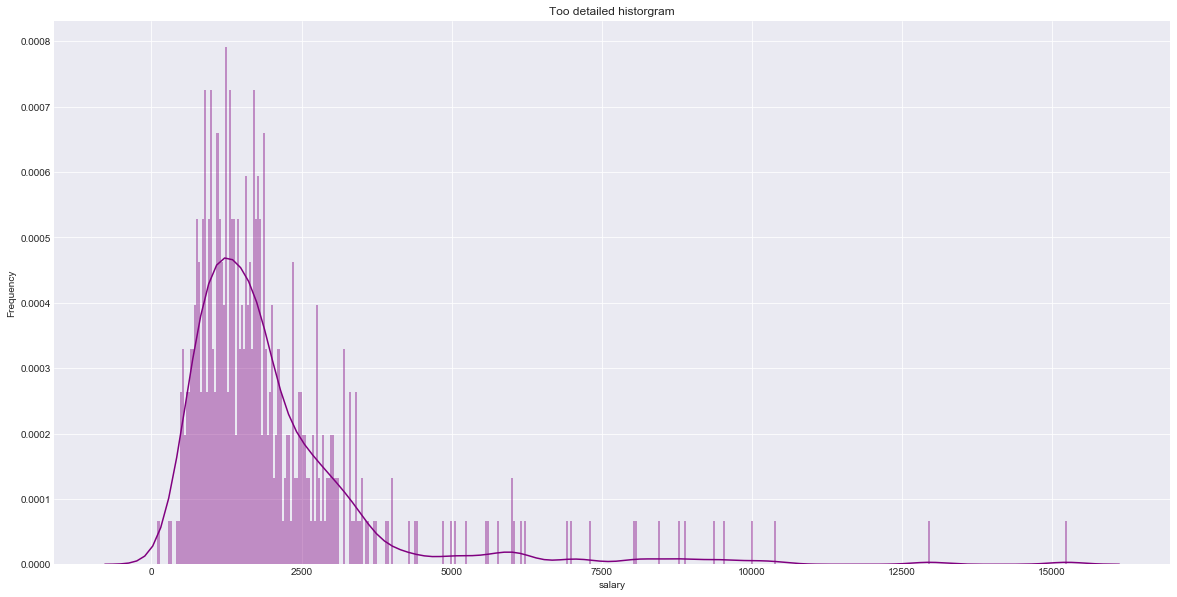

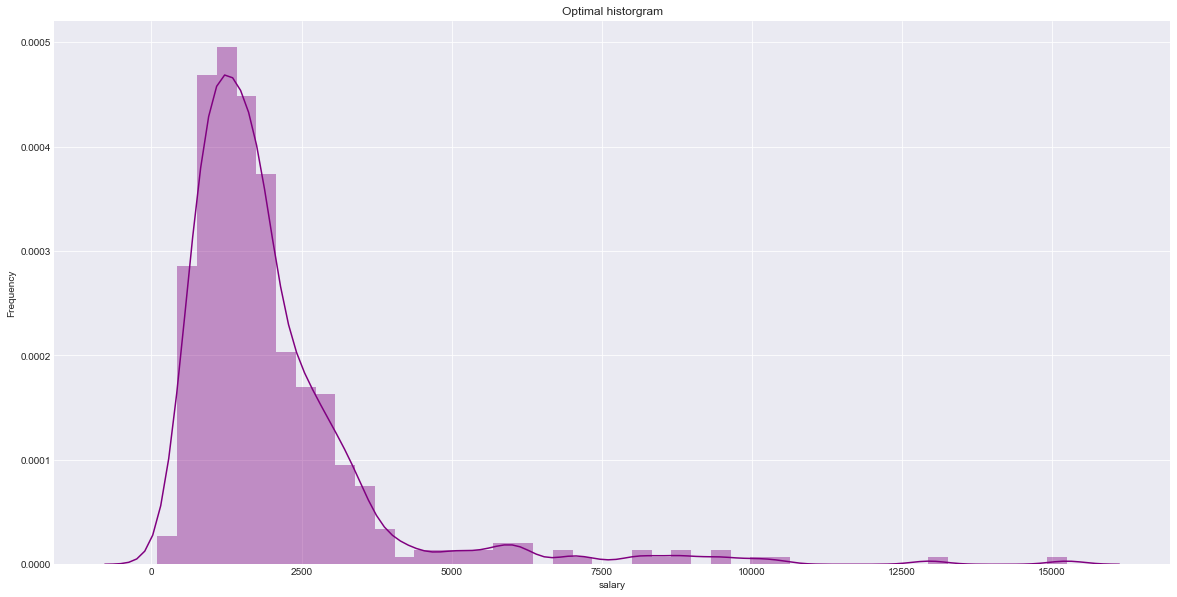

In [477]:
fig, ax = plt.subplots()
ax.set_title('Too smooth historgram')
ax.set_xlabel('Salary')
ax.set_ylabel('Frequency')
_ = sb.distplot(salary, bins=10, color='purple')

fig, ax = plt.subplots()
ax.set_title('Too detailed historgram')
ax.set_xlabel('Salary')
ax.set_ylabel('Frequency')
_ = sb.distplot(salary, bins=salary.shape[0], color='purple')

fig, ax = plt.subplots()
ax.set_title('Optimal historgram')
ax.set_xlabel('Salary')
ax.set_ylabel('Frequency')
_ = sb.distplot(salary, bins='fd', color='purple')

### Logarithm smoothing

> <font size=3>We can use logarithm transformation to smooth our data and reduce outliers influence. We can see that after such transformation mean and median are approximately equal.</font>

Mean: 7.3919
Median: 7.3778


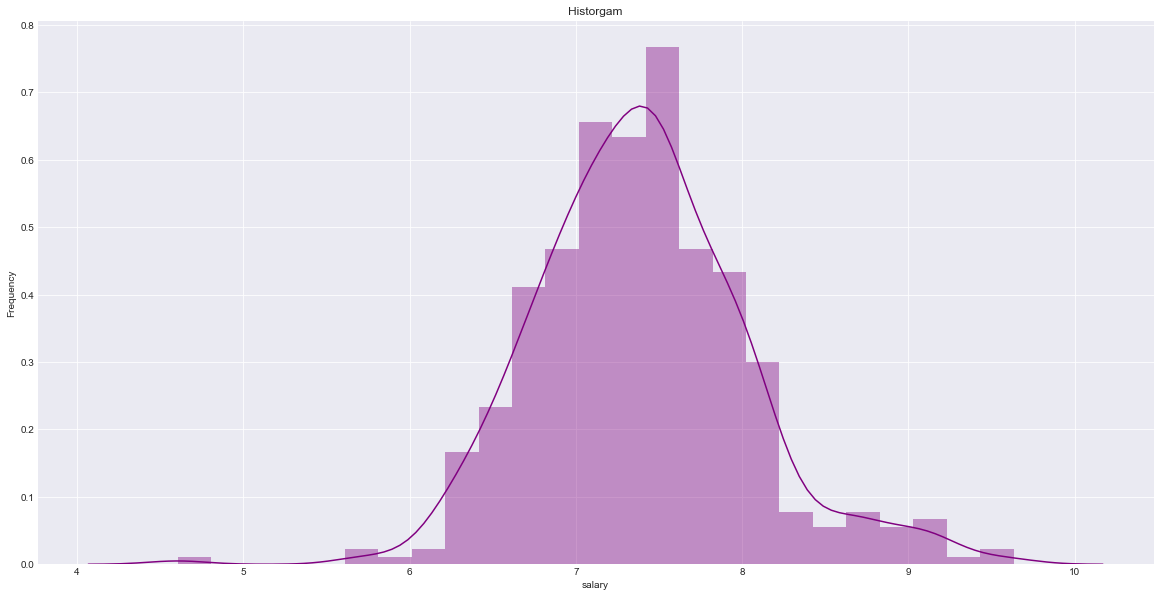

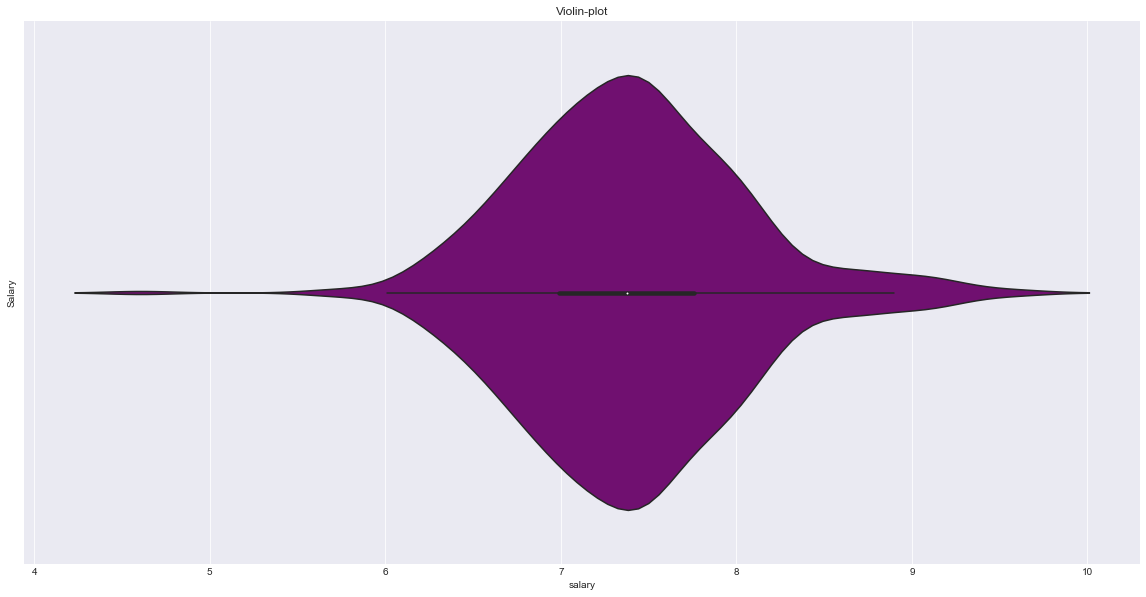

In [478]:
print('Mean: {:.4f}'.format(np.mean(np.log(salary))))
print('Median: {:.4f}'.format(np.median(np.log(salary))))


fig, ax = plt.subplots()
ax.set_title('Historgam')
ax.set_xlabel('Salary')
ax.set_ylabel('Frequency')
_ = sb.distplot(np.log(salary), bins='fd', color='purple')

fig, ax = plt.subplots()
ax.set_title('Violin-plot')
ax.set_ylabel('Salary')
_ = sb.violinplot(np.log(salary), log=True, color='purple')

### Task 2

### Correlation

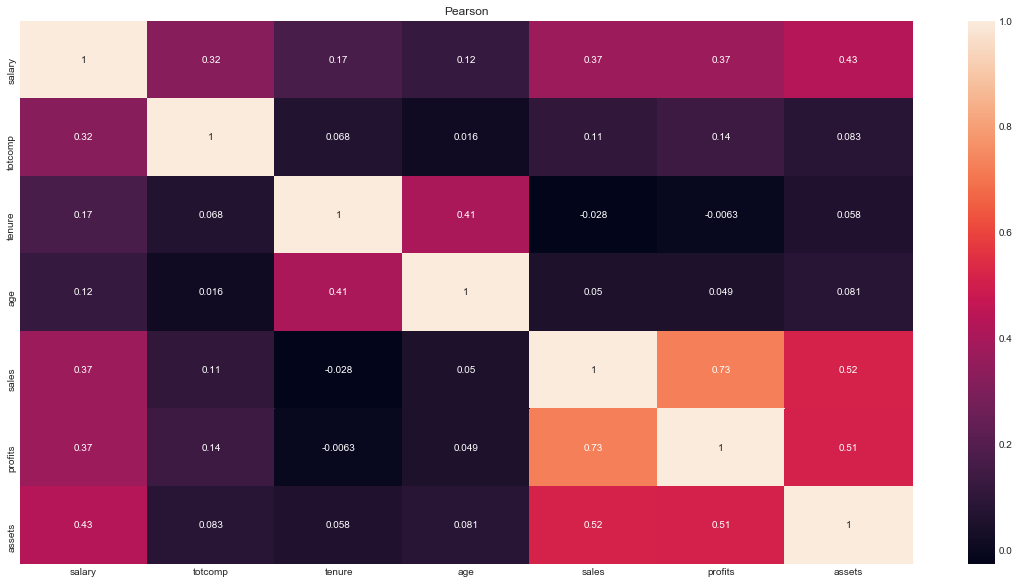

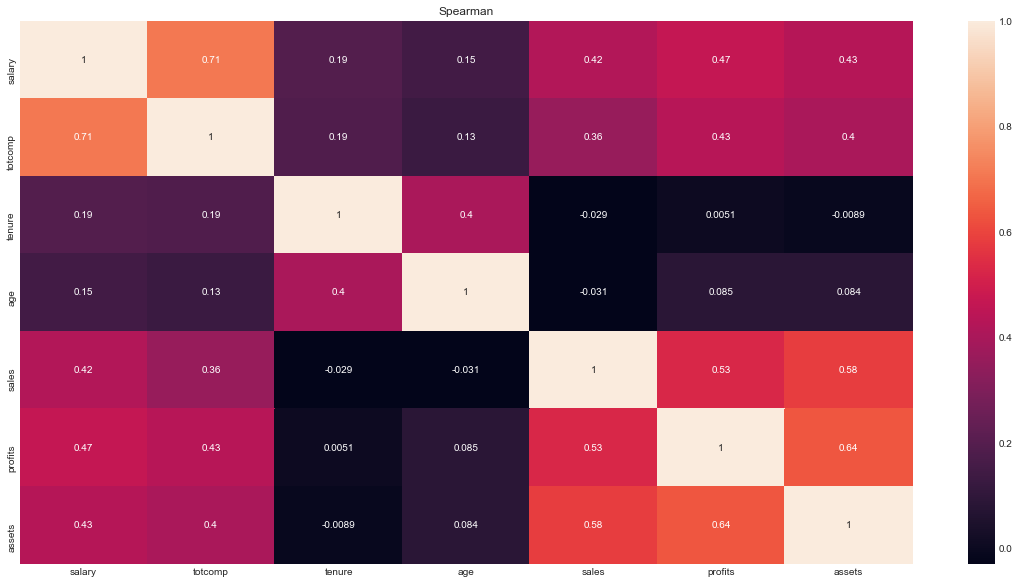

In [479]:
pearson_coefs = data.corr(method='pearson')
spearman_coefs = data.corr(method='spearman')

fig, ax = plt.subplots()
ax.set_title('Pearson')
_ = sb.heatmap(pearson_coefs, annot=True)

fig, ax = plt.subplots()
ax.set_title('Spearman')
_ = sb.heatmap(spearman_coefs, annot=True)

> <font size=3> We see some correlation between sales and profits, sales and assets, profits and assets. But in general those variables are weakly correlated.</font>

### Scatter plots

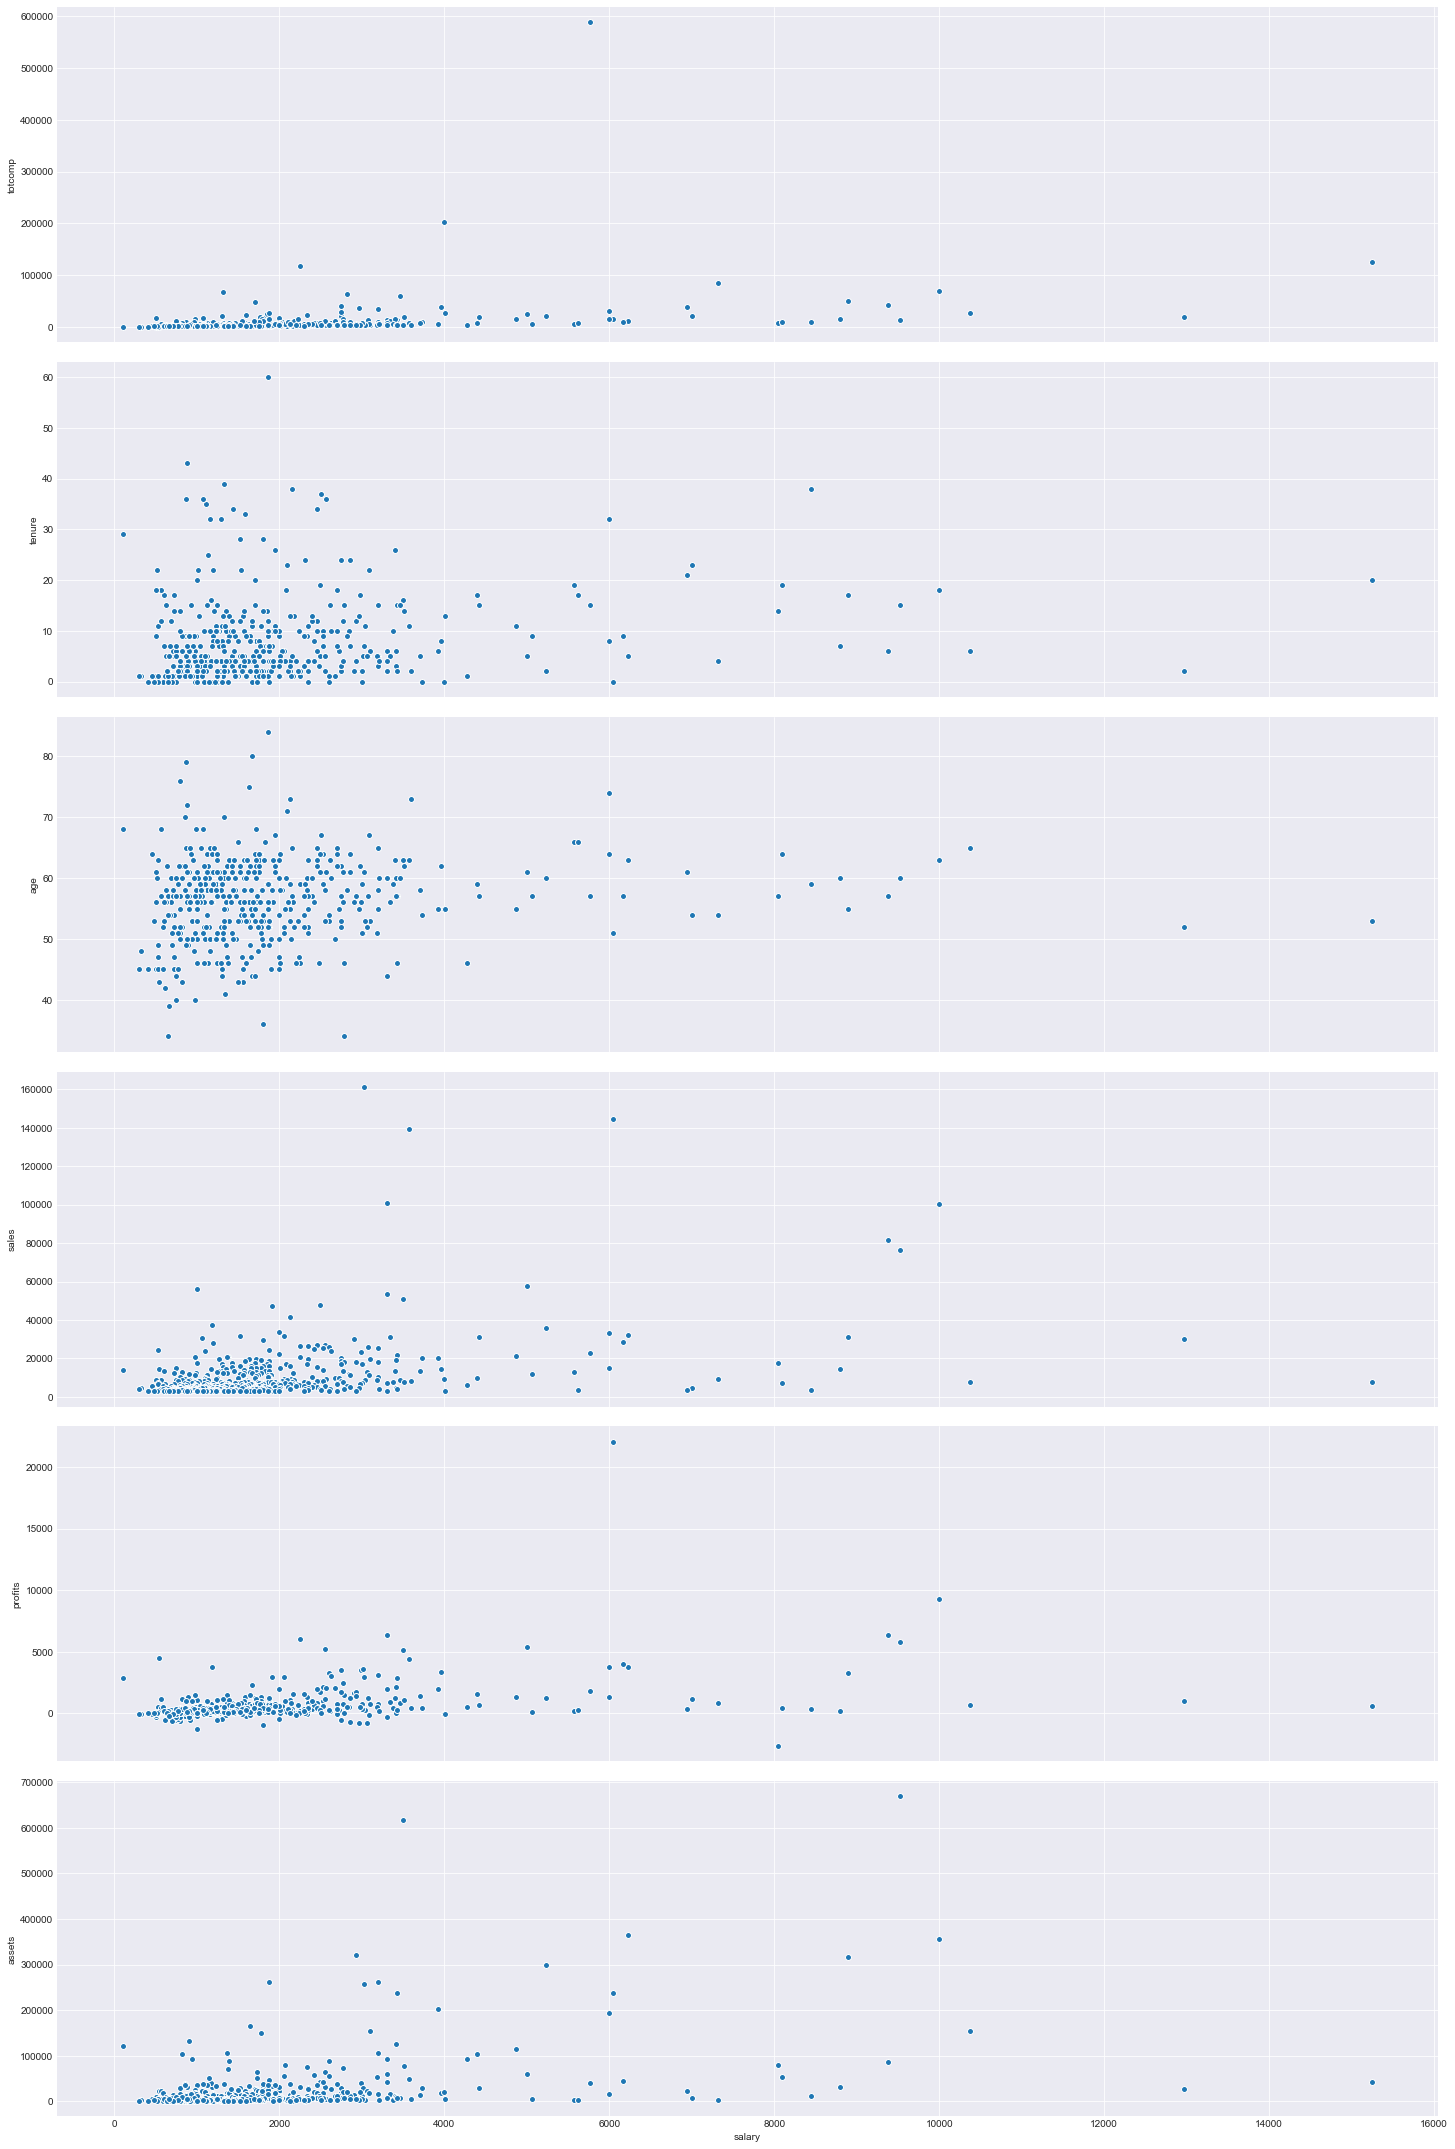

In [480]:
_ = sb.pairplot(data, x_vars=['salary'], y_vars=data.columns.drop('salary'), aspect=4, size=5)

> <font size=3> As we see there is no strong linear correlation between variables, so it's obvious that values of Pearson coefficient are low. </font>

In [483]:
def get_rank(data, value):
    data = data.sort_values().reset_index(drop=True)
    ids = data[data == value].index
    return ids.values.mean() + 1

print('Rank for 6000: {}'.format(get_rank(salary, 6000)))

Rank for 6000: 429.5


### Exploring 2 subsamples

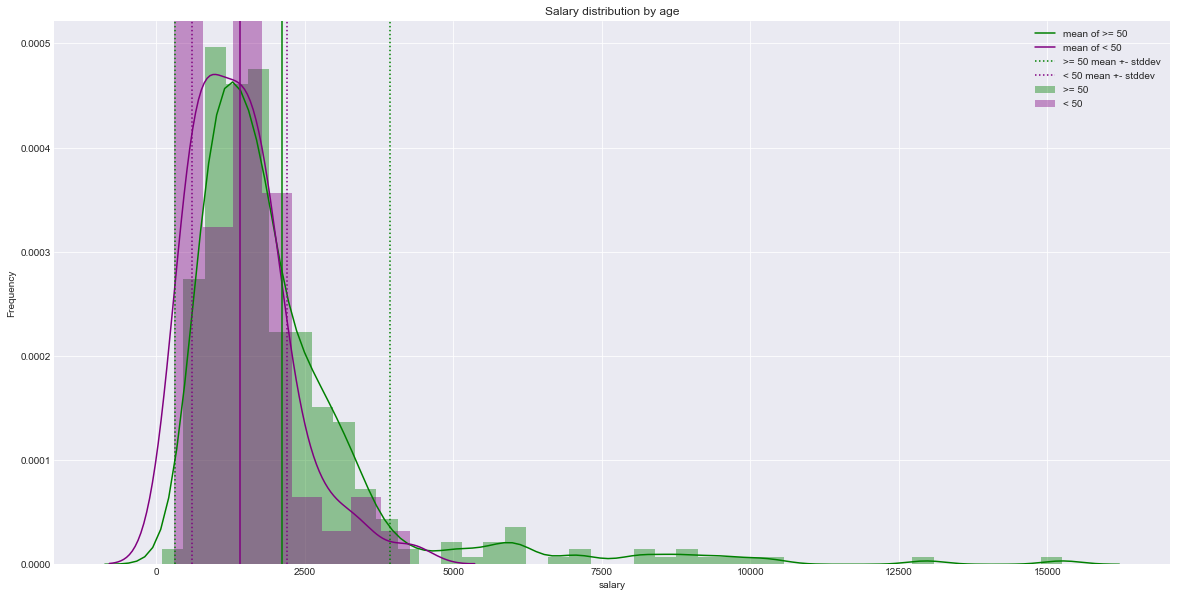

In [416]:
fig, ax = plt.subplots()
ax.set_title('Salary distribution by age')
ax.set_xlabel('salary')
ax.set_ylabel('Frequency')

# plotting histograms
_ = sb.distplot(data[data.age >= 50].salary, bins='fd', label='>= 50', color='green')
_ = sb.distplot(data[data.age < 50].salary, bins='fd', label='< 50', color='purple')


# plotting mean vertical line
ax.axvline(data[data.age >= 50].salary.mean(), color='green', label='mean of >= 50')
ax.axvline(data[data.age < 50].salary.mean(), color='purple', label='mean of < 50')

# plotting  mean +- stddev lines
ax.axvline(data[data.age >= 50].salary.mean() + data[data.age >= 50].salary.std(), color='green', 
           linestyle=':', label='>= 50 mean +- stddev')
ax.axvline(data[data.age >= 50].salary.mean() - data[data.age >= 50].salary.std(), color='green', 
           linestyle=':', label='>= 50 mean +- stddev')
ax.axvline(data[data.age < 50].salary.mean() + data[data.age < 50].salary.std(), color='purple', 
           linestyle=':', label='< 50 mean +- stddev')
ax.axvline(data[data.age < 50].salary.mean() - data[data.age < 50].salary.std(), color='purple', 
           linestyle=':', label='< 50 mean +- stddev')

_ = ax.legend()


> <font size=3>We observe that younger CEOs have lower salary in average, but if we look on dispersion intervals or on skewness of the distribution, we will see that executives older than 50 have higher salary deviation, which is caused by outliers (extremely high wages). So lets look on the same histogram, but after logarithm transformation.</font>

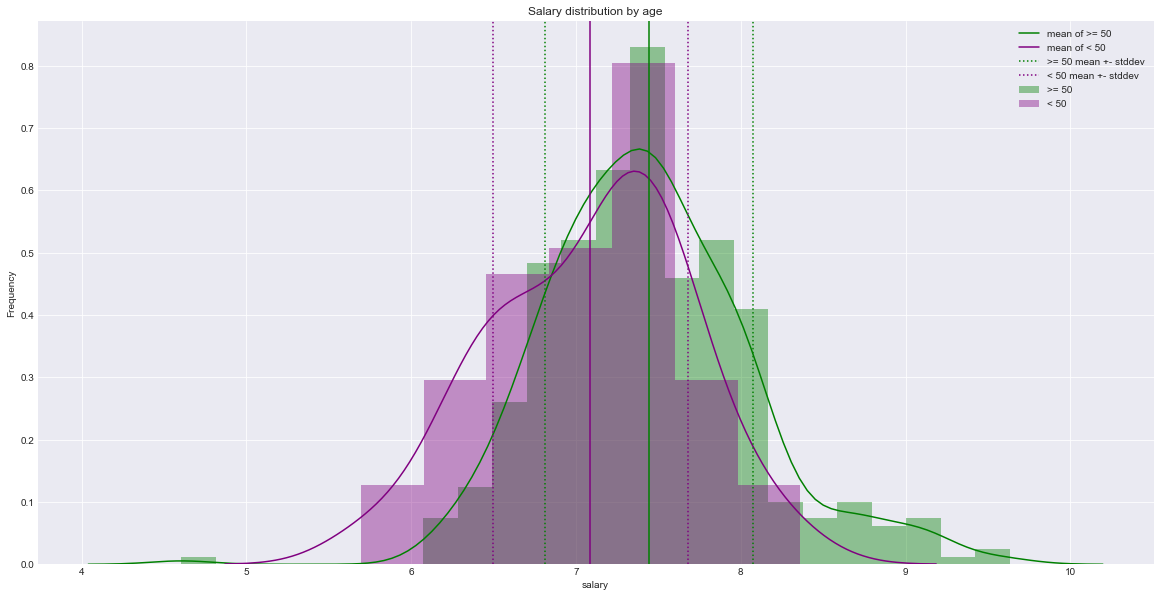

In [423]:
fig, ax = plt.subplots()
ax.set_title('Salary distribution by age')
ax.set_xlabel('salary')
ax.set_ylabel('Frequency')

# plotting histograms
_ = sb.distplot(np.log(data[data.age >= 50].salary), bins='fd', label='>= 50', color='green')
_ = sb.distplot(np.log(data[data.age < 50].salary), bins='fd', label='< 50', color='purple')


# plotting mean vertical line
ax.axvline(np.log(data[data.age >= 50].salary).mean(), color='green', label='mean of >= 50')
ax.axvline(np.log(data[data.age < 50].salary).mean(), color='purple', label='mean of < 50')

# plotting  mean +- stddev lines
ax.axvline(np.log(data[data.age >= 50].salary).mean() + np.log(data[data.age >= 50].salary).std(), color='green', 
           linestyle=':', label='>= 50 mean +- stddev')
ax.axvline(np.log(data[data.age >= 50].salary).mean() - np.log(data[data.age >= 50].salary).std(), color='green', 
           linestyle=':', label='>= 50 mean +- stddev')
ax.axvline(np.log(data[data.age < 50].salary).mean() + np.log(data[data.age < 50].salary).std(), color='purple', 
           linestyle=':', label='< 50 mean +- stddev')
ax.axvline(np.log(data[data.age < 50].salary).mean() - np.log(data[data.age < 50].salary).std(), color='purple', 
           linestyle=':', label='< 50 mean +- stddev')

_ = ax.legend()


> <font size=3>Now we see that younger CEOs have slightly lower salary, but this difference isn't significant.  
But it's better to find some quantative measure of salary-age dependence.</font>

### Task 3

### Aggreagting data

In [270]:
# defining functions for filtering
def age_filter(age):
    if age < 50:
        return 'less than 50'
    else:
        return 'more than 50'
    
def salary_filter(salary):
    if salary < 2000:
        return 'low'
    elif salary >= 2000 and salary < 4000:
        return 'average'
    else:
        return 'high'

In [408]:
# creating columns for groupby
data['age_group'] = data['age'].apply(age_filter)
data['salary_group'] = data['salary'].apply(salary_filter)

# grouping and aggregating data
freqs = data.groupby(['age_group', 'salary_group']).count()  
freqs = freqs[['salary']].rename(columns={'salary' : 'freq'})
relative_freqs = freqs['freq']/freqs['freq'].sum()

# unstacking for better perception
freqs = freqs.unstack()['freq']
relative_freqs = relative_freqs.unstack()

# appending salary marginals 
salary_marginals = pd.Series(freqs.sum(axis=0), name='marginal')
freqs = freqs.append(salary_marginals)

salary_marginals = pd.Series(relative_freqs.sum(axis=0), name='marginal')
relative_freqs = relative_freqs.append(salary_marginals)

# appending age marginals 
freqs['marginal'] = freqs.sum(axis=1)

relative_freqs['marginal'] = relative_freqs.sum(axis=1)

> <font size=3> Frequencies with marginals </font>

In [409]:
freqs

salary_group,average,high,low,marginal
age_group,,,,
less than 50,9,1,52,62
more than 50,107,30,248,385
marginal,116,31,300,447


> <font size=3>Relative frequencies </font>

In [410]:
relative_freqs

salary_group,average,high,low,marginal
age_group,,,,
less than 50,0.020134,0.002237,0.116331,0.138702
more than 50,0.239374,0.067114,0.554810,0.861298
marginal,0.259508,0.069351,0.671141,1.000000


### Interpretation

> <font size=3>Value n12 shows us how many CEOs whose age is less than 50 and income is high.  
Value h12 shows us the same, but normalized by dividing on total amount of CEOs.  
Value n1 is marginal absolute frequency for CEOs whose age is less than 50 and no matter what their salary level is.  
Value n1 is relative absolute frequency for CEOs whose age is less than 50 and no matter what their salary level is, but normalized by dividing on total amount of CEOs. </font>  

### Dependence measure

In [414]:
chi2 = chi2_contingency(freqs.iloc[:2, :3])[0]
cc = np.sqrt(chi2/(chi2 + data.shape[0]))/np.sqrt((2 - 1)/2)
print('Corrected contingency coefficient of Pearson: {:.4f}'.format(cc))

Corrected contingency coefficient of Pearson: 0.2048


> <font size=3> Result is close to 0, so there is weak dependence between variables. </font>